# EDA: Plots

In [1]:
import pandas as pd
from helpers import eda_barplots

In [2]:
df = pd.read_csv('../data/processed_data/data_1.csv')

In [3]:
df.head()

,CRASH_DATETIME,CASUALTY,FRONT_OR_BACK_ENDED,GOING_STRAIGHT_AHEAD,IN_INTERSECTION,TRUCK_TAXI_BIKE,CLUSTER
0,07/01/2012 10:40,0,0,0,0,0,45
1,07/01/2012 12:18,0,0,0,0,1,25
2,07/01/2012 18:00,0,0,0,0,0,69
3,07/01/2012 19:30,0,0,0,0,0,69
4,07/01/2012 20:00,0,0,0,0,1,58


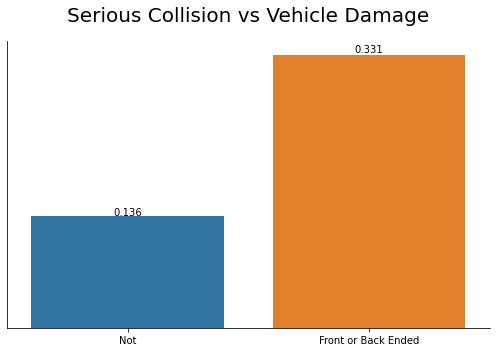

In [4]:
eda_barplots(df, 'Serious Collision vs Vehicle Damage', 'FRONT_OR_BACK_ENDED', 'CASUALTY', 
          size=(7,5), to_filename='eda_damage', xticklabels=['Not', 'Front or Back Ended'])

In [5]:
new = df[['GOING_STRAIGHT_AHEAD', 'IN_INTERSECTION']].copy()
new['OTHER'] = 1 - new.sum(1)
new['CASUALTY'] = df['CASUALTY']
new.columns = new.columns.str.replace('_', ' ').str.title()

In [6]:
new.shape

(279345, 4)

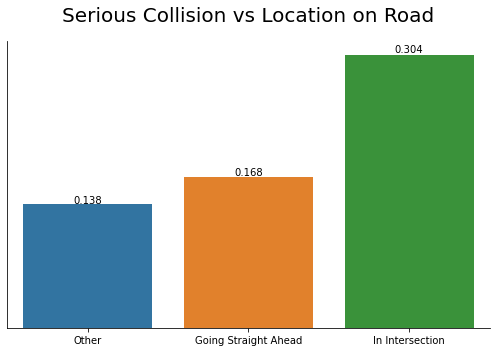

In [7]:
eda_barplots(new.set_index('Casualty', append=True).replace(0, pd.NA).stack().reset_index(), 
             'Serious Collision vs Location on Road', 'level_2', 'Casualty', 
          size=(7,5), to_filename='eda_traffic')

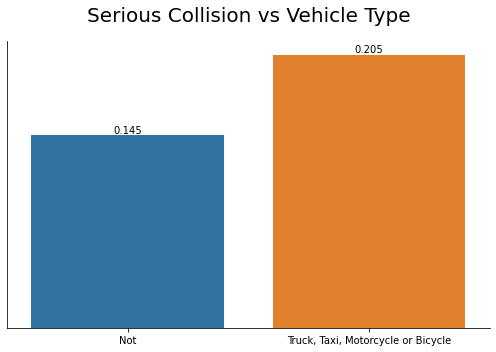

In [8]:
eda_barplots(df, 'Serious Collision vs Vehicle Type', 'TRUCK_TAXI_BIKE', 'CASUALTY', 
          size=(7,5), to_filename='eda_vehicle', xticklabels=['Not', 'Truck, Taxi, Motorcycle or Bicycle'])

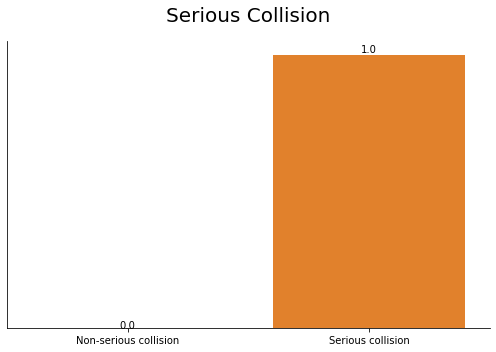

In [12]:
eda_barplots(df, 'Serious Collision', 'CASUALTY', 'CASUALTY', 
          size=(7,5), to_filename='eda_casualty', xticklabels=['Non-serious collision', 'Serious collision'])

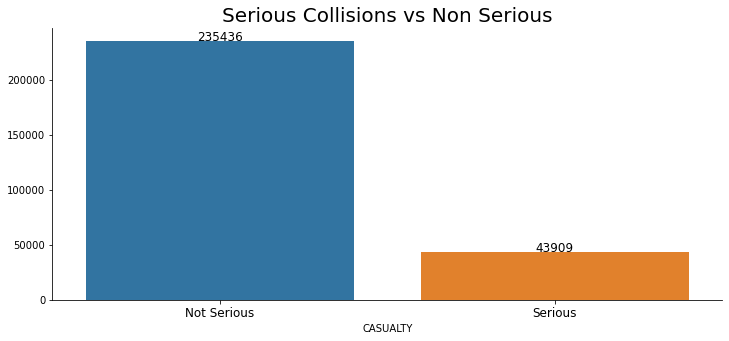

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12,5))
s = df.value_counts('CASUALTY')
sns.barplot(x=s.index, y=s.values, ax=ax)
ax.set_title("Serious Collisions vs Non Serious", fontsize=20)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_xticklabels(['Not Serious', 'Serious'])
for bar, xl in zip(ax.patches, s.index):
    ax.annotate(s[xl], 
                       (bar.get_x() + bar.get_width()/2, bar.get_height()*1.0001),
                       ha='center', color='black', fontsize=12)
sns.despine();
fig.savefig('../images/serious_collisions.png', transparent=True, bbox_inches="tight")